In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
deliveries = pd.read_csv('Ipl Data/deliveries.csv')

In [3]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


In [4]:
#find out top bowlers - counting most number of wickets
bowlers = deliveries[deliveries['dismissal_kind'] != 'run out']
bowlers = deliveries.groupby('bowler').apply(lambda x: x['dismissal_kind'].dropna().reset_index(name='wickets'))
bowlers

index wickets
bowler                            
A Ashish Reddy 0     80497  bowled
               1     80502  caught
               2     81750  caught
               3     82253  caught
               4     83084  caught
...                    ...     ...
Z Khan         114  142480  caught
               115  143476  bowled
               116  144752  caught
               117  147288  caught
               118  149389  caught

[8834 rows x 2 columns]

In [5]:
bowlers_df = bowlers.groupby('bowler').count().reset_index()
top_bowlers = bowlers_df.sort_values(by='wickets', ascending=False)[:10]

In [6]:
top_bowlers

,bowler,index,wickets
294,SL Malinga,188,188
84,DJ Bravo,168,168
6,A Mishra,165,165
113,Harbhajan Singh,161,161
231,PP Chawla,156,156
48,B Kumar,141,141
236,R Ashwin,138,138
300,SP Narine,137,137
330,UT Yadav,136,136
247,R Vinay Kumar,127,127


In [7]:
bowlers_df

,bowler,index,wickets
0,A Ashish Reddy,19,19
1,A Chandila,11,11
2,A Choudhary,5,5
3,A Flintoff,2,2
4,A Joseph,6,6
...,...,...,...
347,YA Abdulla,15,15
348,YK Pathan,46,46
349,YS Chahal,102,102
350,Yuvraj Singh,39,39


Top 10 wicket tackers in the History of IPL


/home/acer/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='wickets', ylabel='bowler'>

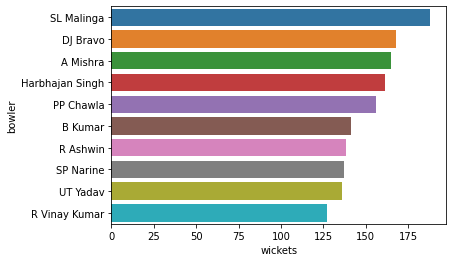

In [8]:
print("Top 10 wicket tackers in the History of IPL")
sns.barplot(top_bowlers['wickets'],top_bowlers['bowler'])

In [9]:
matches_dataset=pd.read_csv("Ipl Data/matches.csv")

In [10]:
matches_dataset['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [13]:
# Highest team score in each season

deliveries=deliveries.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants") 
deliveries=deliveries.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals") 
deliveries=deliveries.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad")

matches = []
total_innings = []
batting_team = []
runs = []

for match_no in deliveries['match_id'].unique():
    for innings in deliveries[ deliveries['match_id']==match_no ]['inning'].unique():
        df = deliveries[
                        (deliveries['match_id']==match_no) &
                        (deliveries['inning']==innings)
        ]
        total_runs = df['total_runs'].sum()
        runs.append(total_runs)
        matches.append(match_no)
        total_innings.append(innings)
        batting_team.append(df['batting_team'].unique()[0])

In [14]:
#Final Dataset after preprocessing
df1 = pd.DataFrame()
df1['match_id'] = matches
df1['total_runs'] = runs
df1['season'] = [matches_dataset[ matches_dataset['id']==i ]['season'].unique()[0] for i in matches] 
df1['batting_team'] = batting_team


df1

,match_id,total_runs,season,batting_team
0,1,207,2017,Sunrisers Hyderabad
1,1,172,2017,Royal Challengers Bangalore
2,2,184,2017,Mumbai Indians
3,2,187,2017,Rising Pune Supergiants
4,3,183,2017,Gujarat Lions
...,...,...,...,...
1523,11413,170,2019,Delhi Capitals
1524,11414,155,2019,Delhi Capitals
1525,11414,162,2019,Chennai Super Kings
1526,11415,152,2019,Mumbai Indians


In [17]:
#Maximum score in each season

season = []
teamId = []
max_runs = []
for year in df1['season'].unique():
    maximum_run = df1[ df1['season']==year ]['total_runs'].max()
    team = df1[ (df1['season']==year) & (df1['total_runs']==maximum_run) ]['batting_team'].unique()[0]
    season.append(year)
    teamId.append(team)
    max_runs.append(maximum_run)

max_runs

[230, 240, 211, 246, 232, 222, 263, 231, 235, 248, 250, 241]

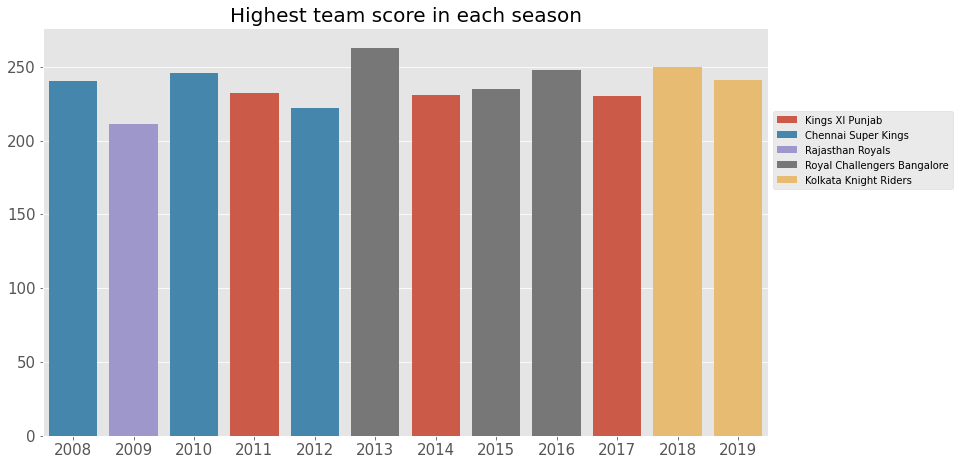

In [18]:
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(13,7.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Highest team score in each season",fontsize=20)
ax=sns.barplot(x = season, y = max_runs, hue = teamId, dodge=False)
ax.legend(loc = 'center left', bbox_to_anchor=(1,0.7))


Batsman's name = DA Warner
Number of Innings Played by DA Warner = 126
DA Warner's Average = 44.13084112149533
DA Warner's Strike rate = 124.66752738981302

Batsman's name = V Kohli
Number of Innings Played by V Kohli = 169
V Kohli's Average = 38.17605633802817
V Kohli's Strike rate = 118.77360039163217

Batsman's name = R Sharma
Number of Innings Played by R Sharma = 194
R Sharma's Average = 30.857142857142858
R Sharma's Strike rate = 107.60903844751408

Batsman's name = AD Russell
Number of Innings Played by AD Russell = 52
AD Russell's Average = 35.375
AD Russell's Strike rate = 159.662336523159

Batsman's name = HH Pandya
Number of Innings Played by HH Pandya = 61
HH Pandya's Average = 29.35135135135135
HH Pandya's Strike rate = 148.34440699460256

Batsman's name = RR Pant
Number of Innings Played by RR Pant = 54
RR Pant's Average = 37.59574468085106
RR Pant's Strike rate = 137.12944646508535



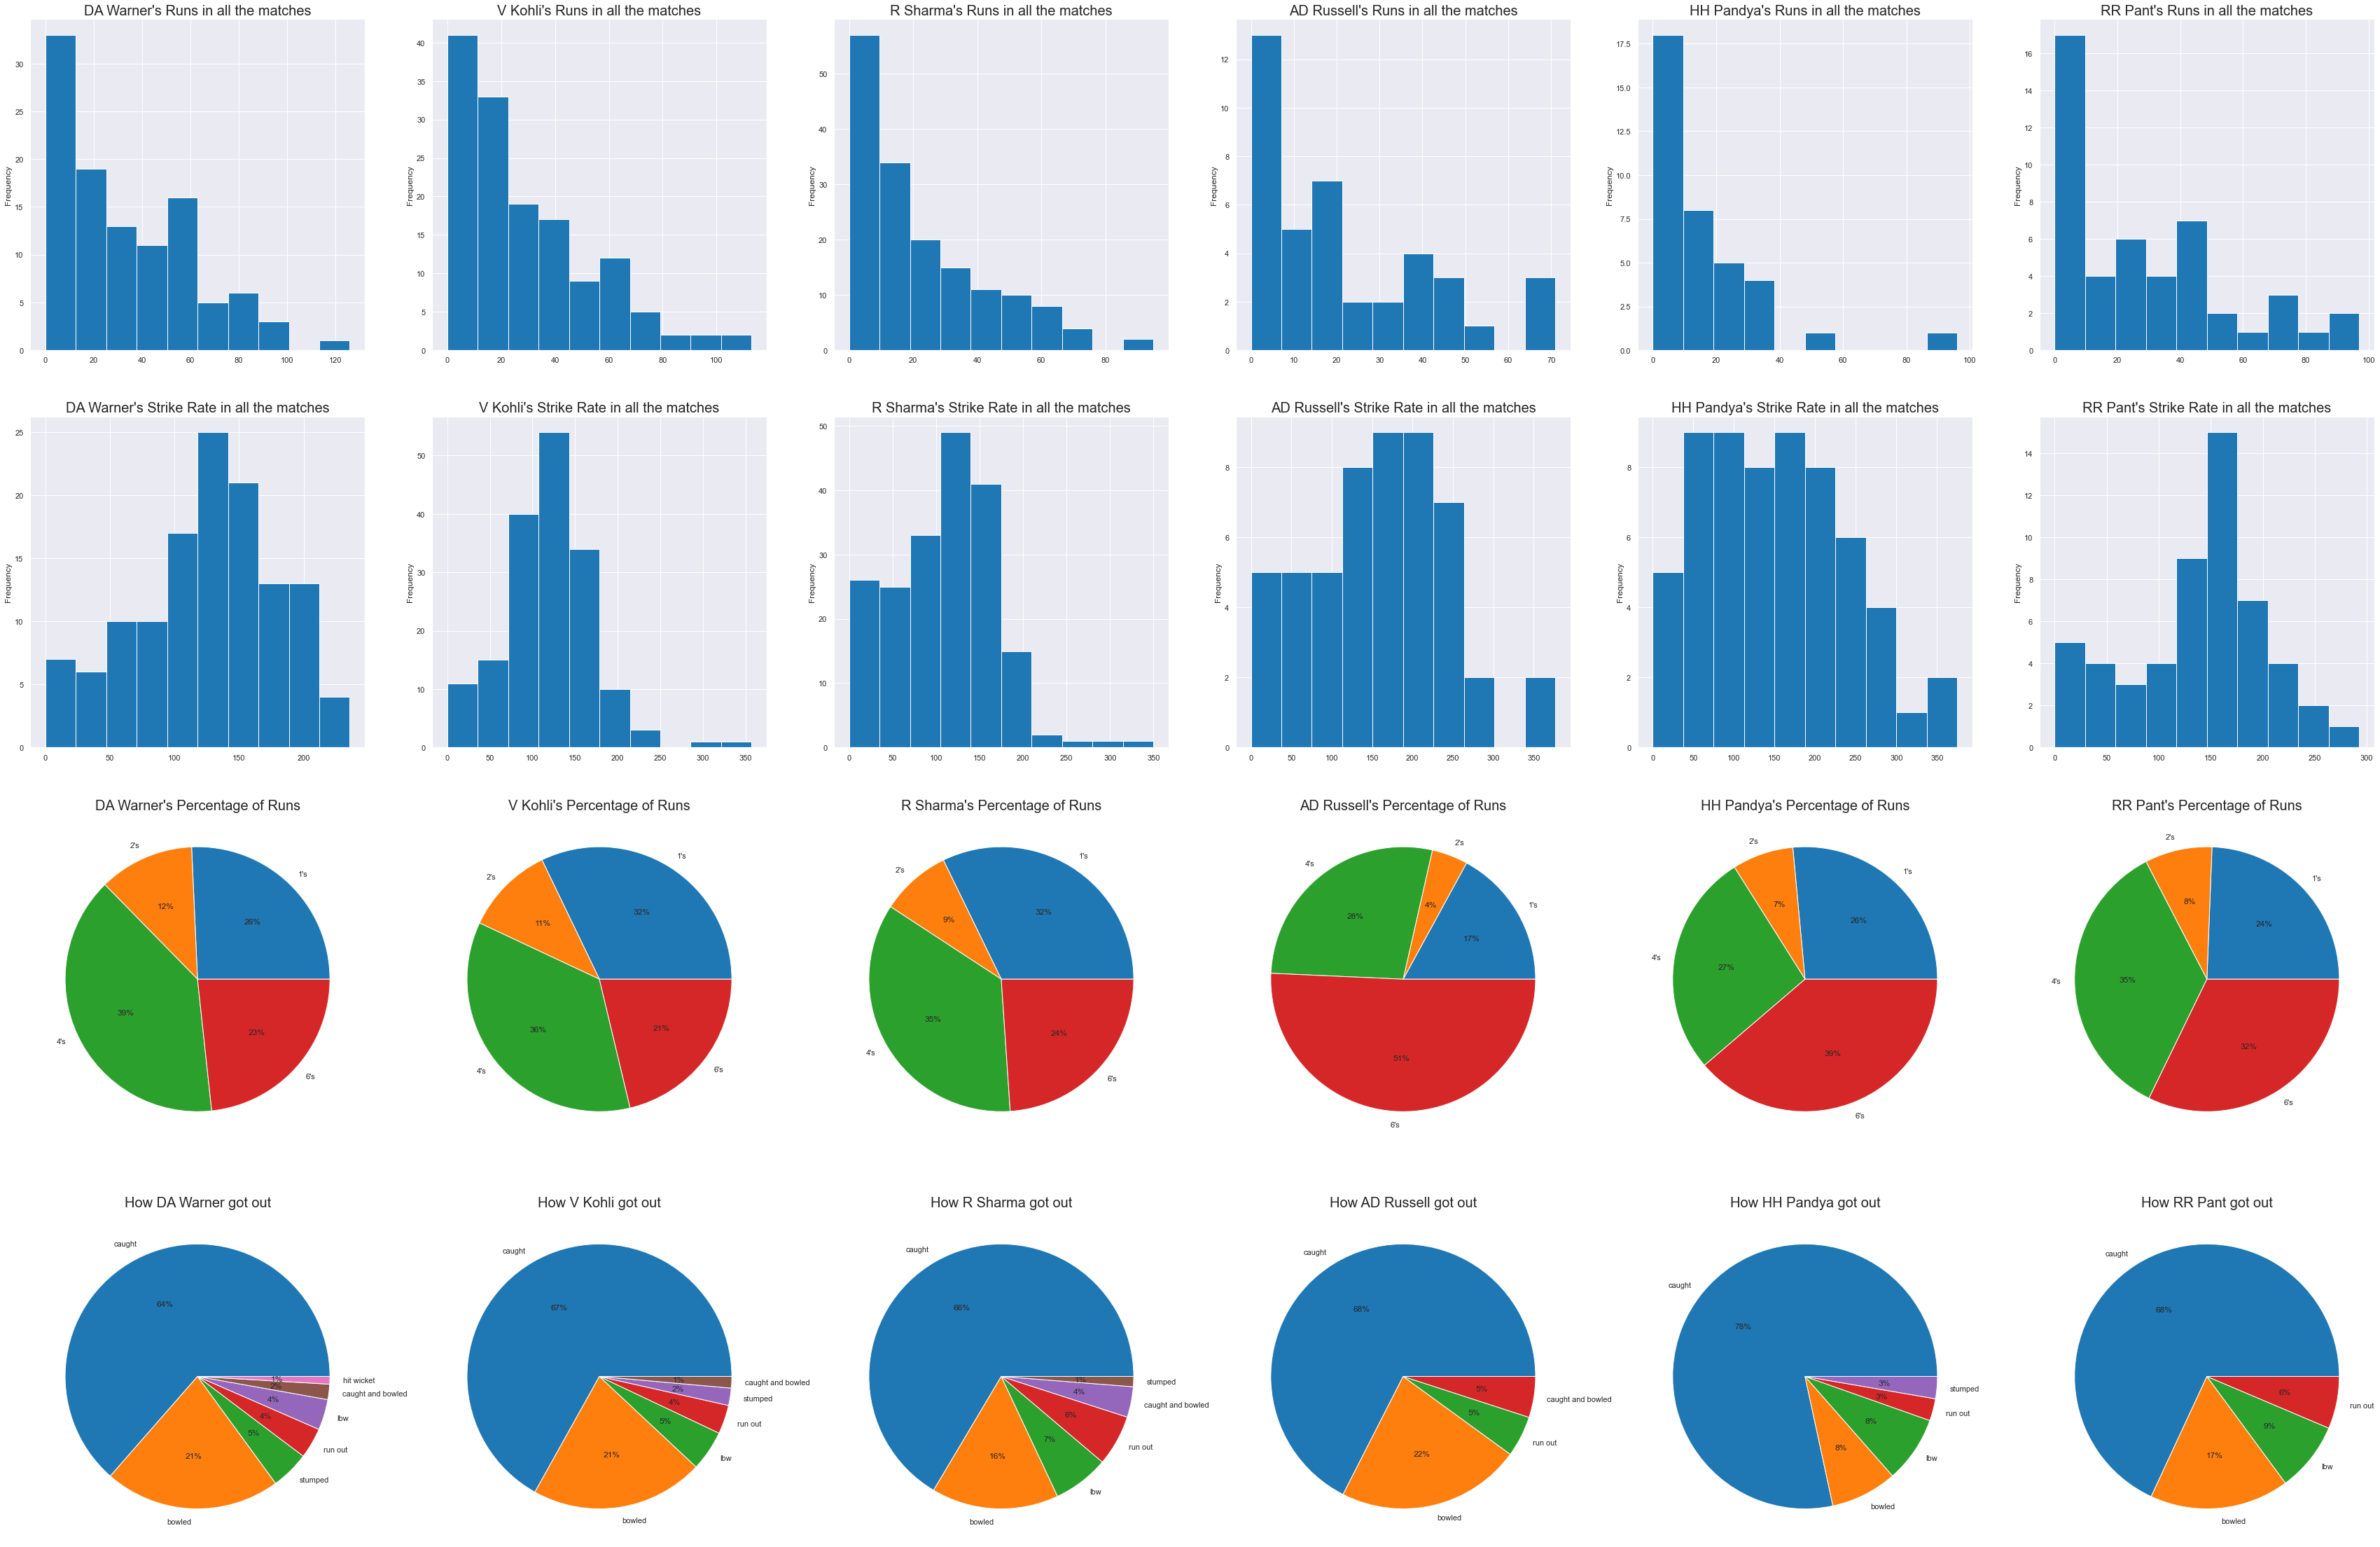

In [18]:
deliveries=deliveries.replace(to_replace='RG Sharma', value='R Sharma')
def Batsmen(bat_name, fig, axes, pos):
    data = []
    for match in deliveries['match_id'].unique():
        df_tmp = deliveries[
                (deliveries['batsman']==bat_name) &
                (deliveries['match_id']==match) &
                (deliveries['is_super_over']==0) &
                (deliveries['wide_runs']==0)
        ]
        if df_tmp.shape[0]==0: continue

        out = 0
        if bat_name in df_tmp['player_dismissed'].unique(): out=1
        how_out = None
        if out: how_out = df_tmp[ df_tmp['player_dismissed']==bat_name ]['dismissal_kind'].unique()[0]

        row = []
        row.append(match)
        row.append(df_tmp['batsman_runs'].sum())
        row.append(df_tmp.shape[0])
        #print(row)
        dic = dict(df_tmp['batsman_runs'].value_counts())
        runs = 0
        for i in range(7):
            if i in dic.keys(): 
                row.append(dic[i])
                runs += i*dic[i]
            else: row.append(0)
        row.append(out)
        row.append(how_out)

        data.append(row)
        #assert(row[2]==sum(row[3:10]))
        #assert(row[1]==runs)

    #print(data)
    df_bat = pd.DataFrame(data, columns=['match_id', 'total_runs', 'total_balls', '0', '1', '2', '3', '4', '5', '6', 'out', 'how_out'])
    df_bat.head(10)
    print("Number of Innings Played by "+bat_name+" = "+str(df_bat.shape[0]))
    if df_bat['out'].sum()!=0: print(bat_name+'\'s Average = '+str(df_bat['total_runs'].sum()/df_bat['out'].sum()))
    
    sns.set()
    sns.set_palette(sns.color_palette('tab10'))
    df_bat[ df_bat['out']==1 ]['total_runs'].plot(kind='hist', ax = axes[0, pos])
    axes[0,pos].set_title(bat_name+'\'s Runs in all the matches', fontsize=20)
    #plt.show()
    
    st = df_bat['total_runs']/df_bat['total_balls']*100
    print(bat_name+'\'s Strike rate = '+str(np.average(st)))
    st.plot(kind='hist', ax = axes[1, pos])
    axes[1,pos].set_title(bat_name+'\'s Strike Rate in all the matches', fontsize=20)
    #plt.show()
    
    runs = []
    for i in [1,2,4,6]:
        runs.append(i*df_bat[str(i)].sum())
    axes[2,pos].pie(runs, labels = ['1\'s','2\'s','4\'s','6\'s'], autopct = "%1.0f%%")
    axes[2,pos].set_title(bat_name+'\'s Percentage of Runs', fontsize=20)
    #plt.show()
    
    axes[3,pos].pie(df_bat['how_out'].value_counts().values, labels = df_bat['how_out'].value_counts().index, autopct = '%1.0f%%')
    axes[3,pos].set_title('How '+bat_name+' got out', fontsize=20)
    #plt.show()
    
name = ['DA Warner', 'V Kohli', 'R Sharma', 'AD Russell', 'HH Pandya', 'RR Pant']
pos = 0
fig, axes = plt.subplots(4,len(name), figsize = (60,40))
for i in name:
    print('Batsman\'s name = '+i)
    Batsmen(i, fig, axes, pos)
    pos +=1
    print()
plt.show()
#fig.savefig('Batsmen.png')